In [1]:
# Import dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

# Set up csv path
batter_path = Path("Resources/batters2023.csv")
pitcher_path = Path("Resources/pitchers2023.csv")

# Import csv files as dataframes
batter_df = pd.read_csv(batter_path)
pitcher_df = pd.read_csv(pitcher_path)


In [2]:
batter_df

qbatter_df = batter_df.loc[batter_df['AB']> 100]

qbatter_df.head(50)

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,Marcus Semien,TEX,2B,33,162,670,122,185,40,4,...,3,72,110,0,5,5,0.276,0.348,0.478,0.826
1,Julio Rodriguez,SEA,OF,23,155,654,102,180,37,2,...,10,47,175,0,2,11,0.275,0.333,0.485,0.818
2,Ronald Acuna,ATL,OF,26,159,643,149,217,35,4,...,14,80,84,0,3,9,0.337,0.416,0.596,1.012
3,Bobby Witt,KC,SS,23,158,641,97,177,28,11,...,15,40,121,1,8,4,0.276,0.319,0.495,0.814
4,Trea Turner,PHI,SS,30,155,639,102,170,35,5,...,0,45,150,0,1,6,0.266,0.320,0.459,0.779
5,Steven Kwan,CLE,OF,26,158,638,93,171,36,7,...,3,70,75,1,6,3,0.268,0.340,0.370,0.710
6,Freddie Freeman,LAD,1B,34,161,637,131,211,59,2,...,1,72,121,0,5,16,0.331,0.410,0.567,0.977
7,Austin Riley,ATL,3B,26,159,636,117,179,32,3,...,1,59,172,0,11,9,0.281,0.345,0.516,0.861
8,Lane Thomas,WAS,OF,28,157,628,101,168,36,3,...,5,36,176,0,7,11,0.268,0.315,0.468,0.783
9,Nick Castellanos,PHI,OF,31,157,626,79,170,37,2,...,2,36,185,0,6,3,0.272,0.311,0.476,0.787


In [44]:
# Generate a summary statistics table that shows data per team

# team

team = qbatter_df.groupby('Team')

# team hits mean

hits_mean = qbatter_df.groupby('Team').mean()['H']

## team homeruns mean

hr_mean = qbatter_df.groupby('Team').mean()['HR']

# sort hrs

sorted_hr = hr_mean.sort_values(ascending=[False])

## team rbis mean

rbi_mean = qbatter_df.groupby('Team').mean()['RBI']

# sort rbis

sorted_rbi = rbi_mean.sort_values(ascending=[False])

# team stolen bases mean

sb_mean = qbatter_df.groupby('Team').mean()['SB']

# caught stealing

cs_mean = qbatter_df.groupby('Team').mean()['CS']

# bases on balls

bb_mean = qbatter_df.groupby('Team').mean()['BB']

## strikeouts

so_mean = qbatter_df.groupby('Team').mean()['SO']

# sorted strikeouts

sorted_so = so_mean.sort_values(ascending=[False])

## BA

ba_mean = qbatter_df.groupby('Team').mean()['AVG']

# sorted BA

sorted_ba = ba_mean.sort_values(ascending=[False])

# OBP

obp_mean = qbatter_df.groupby('Team').mean()['OBP']

# SLG

slg_mean = qbatter_df.groupby('Team').mean()['SLG']


## OPS

ops_mean = qbatter_df.groupby('Team').mean()['OPS']

# sorted OPS

sorted_ops = ops_mean.sort_values(ascending=[False])



team_summary = pd.DataFrame({'Mean Hits': hits_mean,
                            'Mean Homeruns': hr_mean,
                            'Mean RBIS': rbi_mean,
                             'Mean Stolen Bases': sb_mean,
                            'Mean Caught Stealing': cs_mean,
                            'Mean Bases on Balls': bb_mean,
                             'Mean Strikeouts': so_mean,
                            'Mean Batting Average': ba_mean,
                            'Mean OBP': obp_mean,
                            'Mean SLG': slg_mean,
                            'Mean OPS': ops_mean})

team_summary


/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_16440/4252185463.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hits_mean = qbatter_df.groupby('Team').mean()['H']
/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_16440/4252185463.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hr_mean = qbatter_df.groupby('Team').mean()['HR']
/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_16440/4252185463.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only

,Mean Hits,Mean Homeruns,Mean RBIS,Mean Stolen Bases,Mean Caught Stealing,Mean Bases on Balls,Mean Strikeouts,Mean Batting Average,Mean OBP,Mean SLG,Mean OPS
Team,,,,,,,,,,,
ARI,84.333333,10.733333,44.266667,10.666667,1.466667,33.466667,75.333333,0.242933,0.314667,0.386267,0.700933
ATL,134.272727,27.454545,80.545455,10.727273,2.272727,47.272727,109.454545,0.270091,0.335455,0.493182,0.828636
BAL,97.000000,12.928571,54.285714,8.000000,1.714286,34.714286,92.571429,0.256286,0.319714,0.419000,0.738714
BOS,83.375000,10.875000,43.187500,6.062500,1.375000,27.312500,76.875000,0.252250,0.311500,0.410687,0.722187
CHC,89.000000,12.266667,49.000000,9.066667,2.133333,36.066667,84.866667,0.248400,0.325133,0.405533,0.730667
CIN,75.941176,11.058824,41.235294,10.823529,2.647059,30.294118,81.176471,0.249412,0.324765,0.416941,0.741706
CLE,79.294118,7.294118,35.941176,8.823529,2.117647,27.058824,64.529412,0.236176,0.300235,0.369765,0.670000
COL,76.647059,9.176471,37.882353,4.352941,1.411765,25.411765,85.529412,0.247529,0.308706,0.396941,0.705647
CWS,87.285714,11.571429,40.928571,5.000000,1.428571,24.285714,90.285714,0.234786,0.286071,0.380714,0.666786


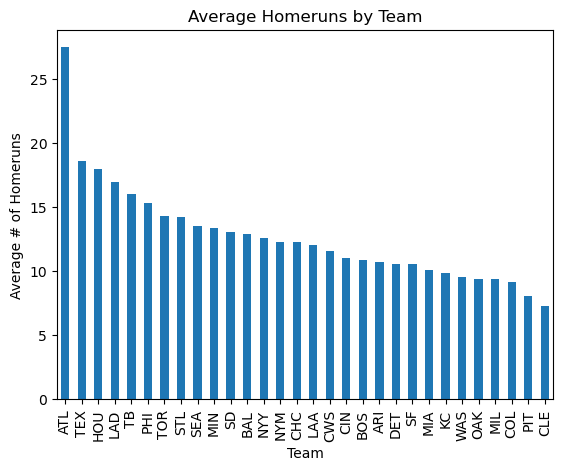

In [39]:
hr_chart = sorted_hr.plot(kind = 'bar',
                         xlabel = 'Team',
                         ylabel = 'Average # of Homeruns',
                         title = 'Average Homeruns by Team')

plt.show()

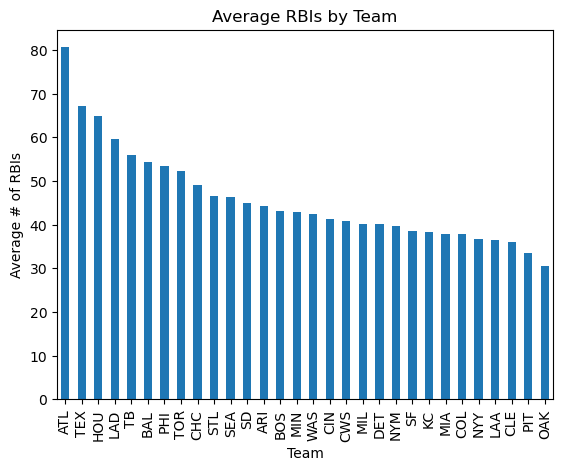

In [41]:
rbi_chart = sorted_rbi.plot(kind = 'bar',
                         xlabel = 'Team',
                         ylabel = 'Average # of RBIs',
                         title = 'Average RBIs by Team')

plt.show()

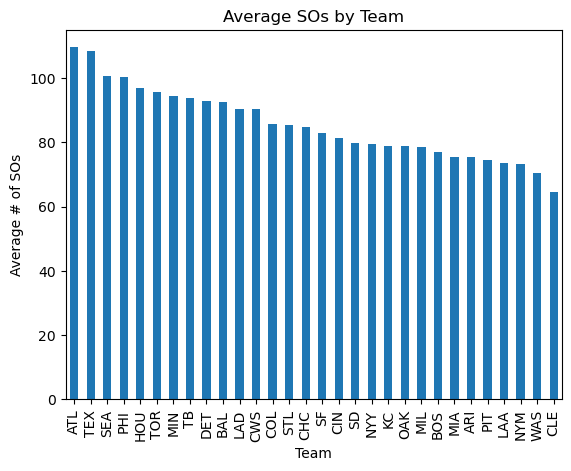

In [43]:
so_chart = sorted_so.plot(kind = 'bar',
                         xlabel = 'Team',
                         ylabel = 'Average # of SOs',
                         title = 'Average SOs by Team')

plt.show()

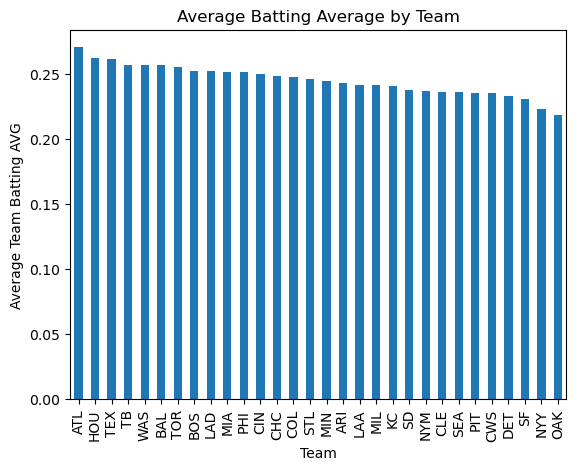

In [48]:
ba_chart = sorted_ba.plot(kind = 'bar',
                         xlabel = 'Team',
                         ylabel = 'Average Team Batting AVG',
                         title = 'Average Batting Average by Team')


plt.show()

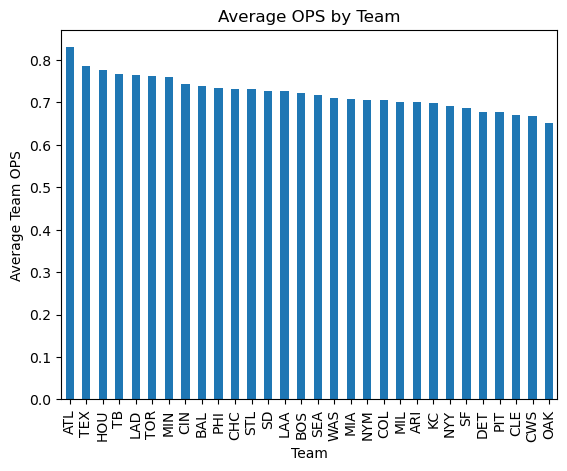

In [49]:
ops_chart = sorted_ops.plot(kind = 'bar',
                         xlabel = 'Team',
                         ylabel = 'Average Team OPS',
                         title = 'Average OPS by Team')


plt.show()